In [ ]:
import numpy as np
from scipy.stats import lognorm, weibull_min
# Define baseline TC rate (5 per year)
lambda_base = 5  

# Adjust based on scenario (example: +20% under RCP 8.5)
lambda_scenario = lambda_base * 1.2  

# Sample number of storms for a 50-year period
n_years = 50

# Weibull parameters (example based on historical data)
alpha, beta = 2, 50  # Shape and scale parameters

# Adjust for climate scenario (e.g., 10% stronger storms in RCP 8.5)
beta_scenario = beta * 1.1

# Lognormal parameters for storm radius (historical data)
mu, sigma = 3, 0.5  # Lognormal shape parameters

# Adjust for climate scenario (e.g., larger storms)
mu_scenario = mu + 0.2  



[ 5  7  8  7  3 11  4  3  7 10  3  7  6  7  5  7 10  7  3  8  4  5  7  3
  6  6 11  6  6  8  9  5  6  7  7  6  6  8  9  7  3  7  6  5  2  6  3 12
  9  3]
316


In [ ]:
def damage_function(wind_speed, W0=100, k=0.1):
    return 1 / (1 + np.exp(-k * (wind_speed - W0)))  # Sigmoidal function

[5.98967390e-04 5.21499724e-02 4.22827691e-04 7.47882292e-04
 4.99060805e-03 3.40622038e-04 1.81024105e-03 1.63122251e-02
 2.33648323e-02 5.79989742e-02 1.52809574e-03 4.17491035e-03
 7.79557529e-04 5.75799321e-02 1.16494613e-03 3.15165526e-02
 3.89717853e-04 2.90446914e-03 1.87519843e-01 4.41702430e-04
 1.78369528e-01 7.18038197e-03 1.75601167e-02 5.58237098e-03
 1.76400735e-02 8.40257757e-02 3.33518410e-03 2.95951459e-04
 1.13433645e-03 5.84953430e-02 4.15762245e-04 1.96959908e-04
 1.64846037e-01 1.47111772e-03 1.34713806e-02 3.39575547e-02
 3.58313505e-02 6.06169608e-01 9.06949231e-01 2.87391490e-02
 9.04890699e-02 1.05798719e-01 7.73854378e-04 1.40247766e-04
 5.93393221e-02 1.85548484e-03 1.52582420e-02 2.76916588e-02
 4.66753095e-04 1.70924301e-03 6.60740519e-02 8.45557223e-03
 1.53422963e-04 3.93346329e-04 1.85821228e-02 2.60531891e-04
 1.84214984e-04 3.01537782e-04 1.01426800e-04 4.76273735e-04
 4.57896019e-03 1.65853938e-03 9.95467916e-02 1.71489070e-04
 6.22212530e-02 4.779089

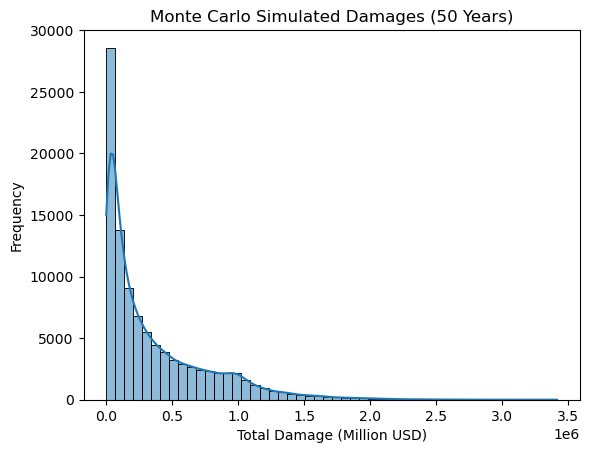

In [17]:
n_simulations = 100000
damage_results = []

for _ in range(n_simulations):
    n_tc = np.random.poisson(lambda_scenario)  # Number of TCs
    wind_speeds = weibull_min.rvs(alpha, scale=beta_scenario, size=n_tc)
    damages = damage_function(wind_speeds)
    total_damage = sum(damages) * 1e6  # Convert to monetary impact
    damage_results.append(total_damage)

# Analyze distribution
import seaborn as sns
sns.histplot(damage_results, bins=50, kde=True)
plt.xlabel("Total Damage (Million USD)")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulated Damages (50 Years)")
plt.show()


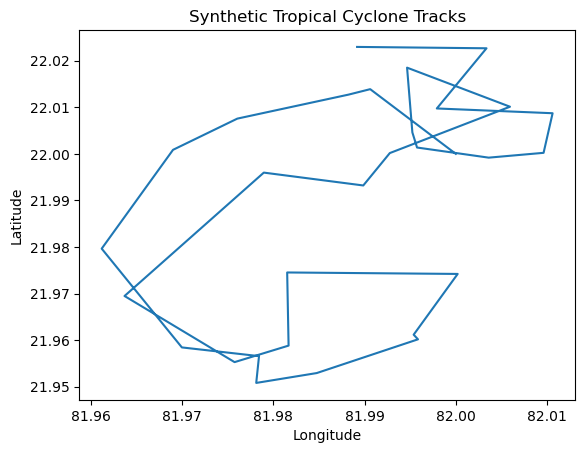

In [125]:
import numpy as np
import matplotlib.pyplot as plt

def generate_tc_track(n_steps=29, start_pos=(np.random.randint(68, 98), np.random.randint(8, 36))):
    """Generate a synthetic TC track with random movement."""
    lon, lat = [start_pos[0]], [start_pos[1]]
    for _ in range(n_steps):
        dx, dy = np.random.normal(0, 0.01), np.random.normal(0, 0.01)  # Slight movement
        lon.append(lon[-1] + dx)
        lat.append(lat[-1] + dy)
    return np.array(lon), np.array(lat)

# Generate multiple synthetic storms
for _ in range(1):
    lon, lat = generate_tc_track()
    plt.plot(lon, lat)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Synthetic Tropical Cyclone Tracks")
plt.show()


In [ ]:
from climada.hazard import TropCyclone
import pandas as pd

# Create synthetic track dataframe
track_data = {
    "SID": ["TC001"] * 30,   # Storm ID
    "TIME": np.arange(30),   # Time steps
    "LAT": lat,              # Latitude values
    "LON": lon,              # Longitude values
    "PRES": np.linspace(980, 940, 30),  # Central pressure (hPa)
    "WIND": np.linspace(50, 250, 30)    # Wind speed (km/h)
}
track_data

{'SID': ['TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001',
  'TC001'],
 'TIME': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 'LAT': array([29.        , 29.62198418, 29.79378828, 32.68689795, 32.44658803,
        32.85732032, 33.41573645, 36.58602372, 38.43361907, 39.40878939,
        40.25357896, 39.99410852, 40.10253974, 41.10374465, 42.17136623,
        41.66135642, 41.48922742, 43.03466188, 43.81306524, 45.9512154 ,
        47.89325252, 49.1775752 , 50.6077856 , 50.25837765, 51.83132678,
        54.1171742 , 55.17493194, 56.17047486, 58.67560831, 60.4531294 ,
        61.64663262]),
 'LON': array([ 85.        ,  85.

In [61]:
for key, value in track_data.items():
    print(f"{key}: {len(value)}")


SID: 31
TIME: 31
LAT: 31
LON: 31
PRES: 31
WIND: 31


In [55]:
# Convert to TropCyclone object
tc = TropCyclone.from_df(df_tc)
tc.plot()


AttributeError: type object 'TropCyclone' has no attribute 'from_df'